<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 90.8 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)


In [3]:
# --- Basic Data Cleaning & Preparation ---
print("\n--- Initial Data Cleaning ---")

# Define numeric columns based on analysis (add more as needed)
numeric_cols = ['Respondent', 'CompTotal', 'ConvertedCompYearly', 'WorkWeekHrs',
                'CodeRevHrs', 'JobSatPoints_6', 'WorkExp']
# Note: Age, YearsCodePro, YearsCode need special handling due to text values.

# Convert identified numeric columns, coercing errors
for col in numeric_cols:
    if col in df.columns:
        print(f"Converting column '{col}' to numeric.")
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Clean Age column
if 'Age' in df.columns:
    print("Cleaning 'Age' column.")
    df['Age'] = df['Age'].astype(str).str.strip()
else:
    print("Warning: Column 'Age' not found.")

# Define age order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]


--- Initial Data Cleaning ---
Converting column 'CompTotal' to numeric.
Converting column 'ConvertedCompYearly' to numeric.
Converting column 'JobSatPoints_6' to numeric.
Converting column 'WorkExp' to numeric.
Cleaning 'Age' column.



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.





--- Task 1.1: Age vs. Job Satisfaction (Strip Plot) ---


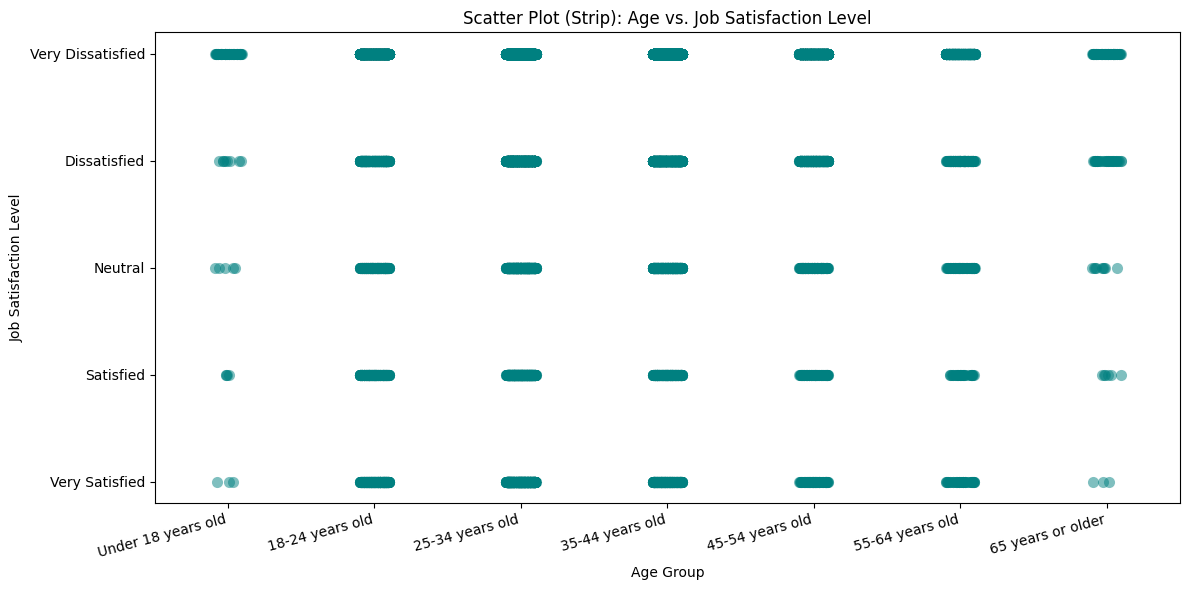

In [4]:
# --- Task 1: Exploring Relationships with Scatter Plots ---

# 1. Scatter Plot for Age vs. Job Satisfaction (Strip Plot - Replicating Lab Code)
print("\n--- Task 1.1: Age vs. Job Satisfaction (Strip Plot) ---")
if 'Age' in df.columns and 'JobSatPoints_6' in df.columns:
    # Prepare data specifically for this task
    data_task1_1 = df[['Age', 'JobSatPoints_6']].copy()
    data_task1_1.dropna(inplace=True) # Drop rows where either Age or JobSatPoints_6 is NaN

    # Filter valid age groups and set categorical type
    data_task1_1 = data_task1_1[data_task1_1['Age'].isin(age_order)]
    data_task1_1['Age'] = pd.Categorical(data_task1_1['Age'], categories=age_order, ordered=True)

    # Categorize satisfaction
    def satisfaction_label(score):
        if pd.isna(score): return None # Should already be handled by dropna, but good practice
        if score <= 20: return 'Very Dissatisfied'
        elif score <= 40: return 'Dissatisfied'
        elif score <= 60: return 'Neutral'
        elif score <= 80: return 'Satisfied'
        else: return 'Very Satisfied'

    job_sat_order = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
    data_task1_1['JobSatisfactionLevel'] = data_task1_1['JobSatPoints_6'].apply(satisfaction_label)
    data_task1_1['JobSatisfactionLevel'] = pd.Categorical(data_task1_1['JobSatisfactionLevel'],
                                                     categories=job_sat_order, ordered=True)
    data_task1_1.dropna(subset=['JobSatisfactionLevel'], inplace=True) # Drop if label couldn't be assigned

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.stripplot(data=data_task1_1, x='Age', y='JobSatisfactionLevel', alpha=0.5,
                  jitter=True, size=8, color='teal') # Adjusted size slightly
    plt.title('Scatter Plot (Strip): Age vs. Job Satisfaction Level')
    plt.xlabel('Age Group')
    plt.ylabel('Job Satisfaction Level')
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Task 1.1: Required columns 'Age' or 'JobSatPoints_6' not found.")

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.



--- Task 1.2: Compensation vs. Job Satisfaction ---
Filtered out 254 rows with compensation > $300,000


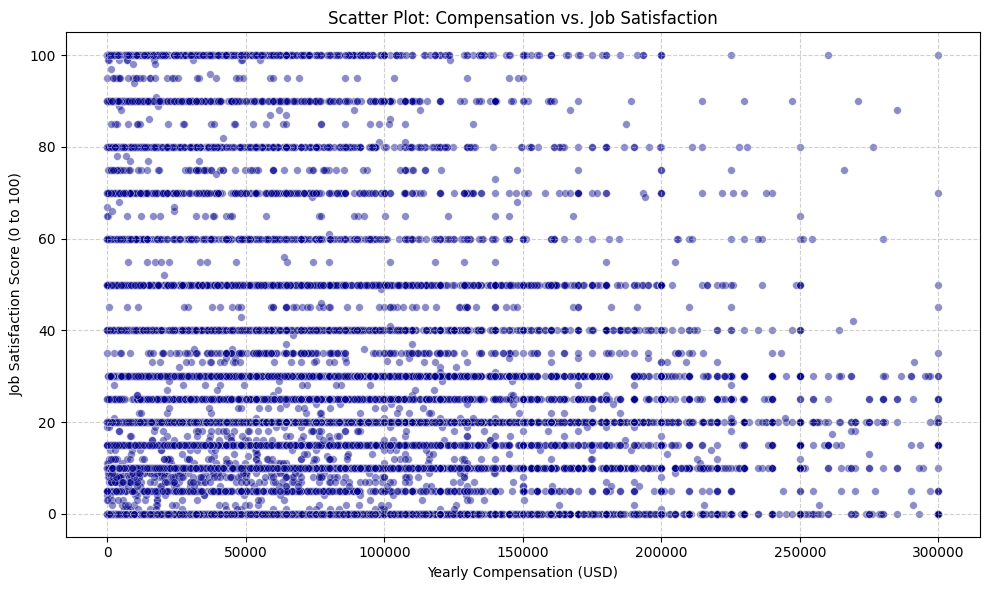

In [5]:
## Write your code here

# 2. Scatter Plot for Compensation vs. Job Satisfaction (Replicating Lab Code)
print("\n--- Task 1.2: Compensation vs. Job Satisfaction ---")
if 'ConvertedCompYearly' in df.columns and 'JobSatPoints_6' in df.columns:
    # Prepare data
    data_task1_2 = df[['ConvertedCompYearly', 'JobSatPoints_6']].copy()
    # Ensure numeric types were handled earlier, drop remaining NaNs
    data_task1_2.dropna(inplace=True)

    # Filter extreme compensation values
    comp_threshold = 300000
    rows_before = len(data_task1_2)
    data_task1_2 = data_task1_2[data_task1_2['ConvertedCompYearly'] <= comp_threshold]
    rows_after = len(data_task1_2)
    print(f"Filtered out {rows_before - rows_after} rows with compensation > ${comp_threshold:,}")

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data_task1_2, x='ConvertedCompYearly', y='JobSatPoints_6', alpha=0.45, color="darkblue", s=30) # Adjusted size
    plt.title('Scatter Plot: Compensation vs. Job Satisfaction')
    plt.xlabel('Yearly Compensation (USD)')
    plt.ylabel('Job Satisfaction Score (0 to 100)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Task 1.2: Required columns 'ConvertedCompYearly' or 'JobSatPoints_6' not found.")

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.



--- Task 2.1: Age vs. Job Satisfaction with Trend Line ---


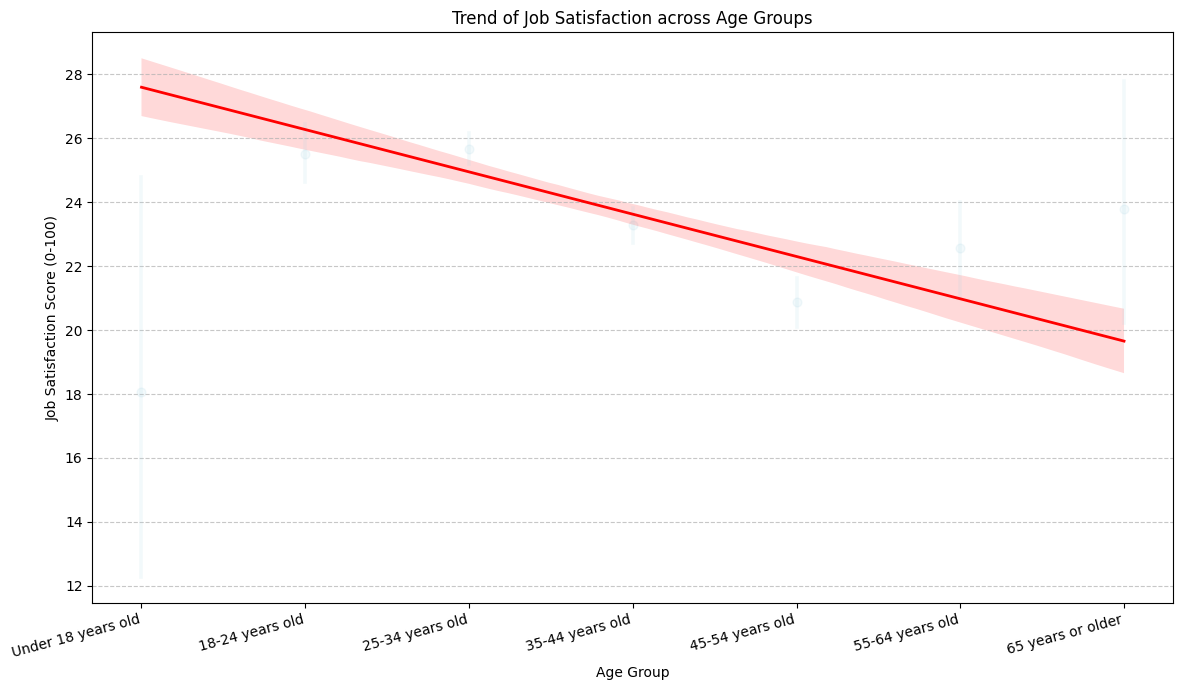

In [7]:
# --- Task 2: Enhancing Scatter Plots ---

# 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction
print("\n--- Task 2.1: Age vs. Job Satisfaction with Trend Line ---")
if 'Age' in df.columns and 'JobSatPoints_6' in df.columns:
    # Prepare data (similar to 1.1 but using numeric JobSatPoints_6 for regplot)
    data_task2_1 = df[['Age', 'JobSatPoints_6']].copy()
    # Ensure JobSatPoints_6 is numeric before dropping NA
    data_task2_1['JobSatPoints_6'] = pd.to_numeric(data_task2_1['JobSatPoints_6'], errors='coerce')
    data_task2_1.dropna(inplace=True)

    # Filter valid age groups and set categorical type
    data_task2_1 = data_task2_1[data_task2_1['Age'].isin(age_order)]
    data_task2_1['Age'] = pd.Categorical(data_task2_1['Age'], categories=age_order, ordered=True)

    # --- FIX: Create numeric representation for x-axis ---
    data_task2_1['Age_Code'] = data_task2_1['Age'].cat.codes # Get numeric codes (0, 1, 2...)

    # Plotting with regression line using numeric Age_Code for x
    plt.figure(figsize=(12, 7))
    ax = sns.regplot(data=data_task2_1, x='Age_Code', y='JobSatPoints_6', # Use Age_Code for x
                     x_estimator=np.mean, # Plot mean satisfaction per age group code
                     ci=95,                # Show 95% confidence interval ribbon
                     scatter_kws={'alpha':0.15, 's': 40, 'color':'lightblue'}, # Style underlying scatter
                     line_kws={'color':'red', 'linewidth': 2})                # Style regression line

    # --- FIX: Set x-axis ticks and labels back to original categories ---
    ax.set_xticks(range(len(age_order))) # Set ticks at positions 0, 1, 2...
    ax.set_xticklabels(age_order)       # Set labels corresponding to categories

    plt.title('Trend of Job Satisfaction across Age Groups')
    plt.xlabel('Age Group') # Keep the label meaningful
    plt.ylabel('Job Satisfaction Score (0-100)') # Changed y-label to reflect numeric score
    plt.xticks(rotation=15, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Task 2.1: Required columns 'Age' or 'JobSatPoints_6' not found.")


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.



--- Generating: Scatter Plot for Age vs. Work Experience ---
Cleaning 'YearsCodePro' column for plotting...
Using 51610 rows after cleaning and dropping NAs for Age/YearsCodePro.
Using 51487 rows after filtering for valid age groups.


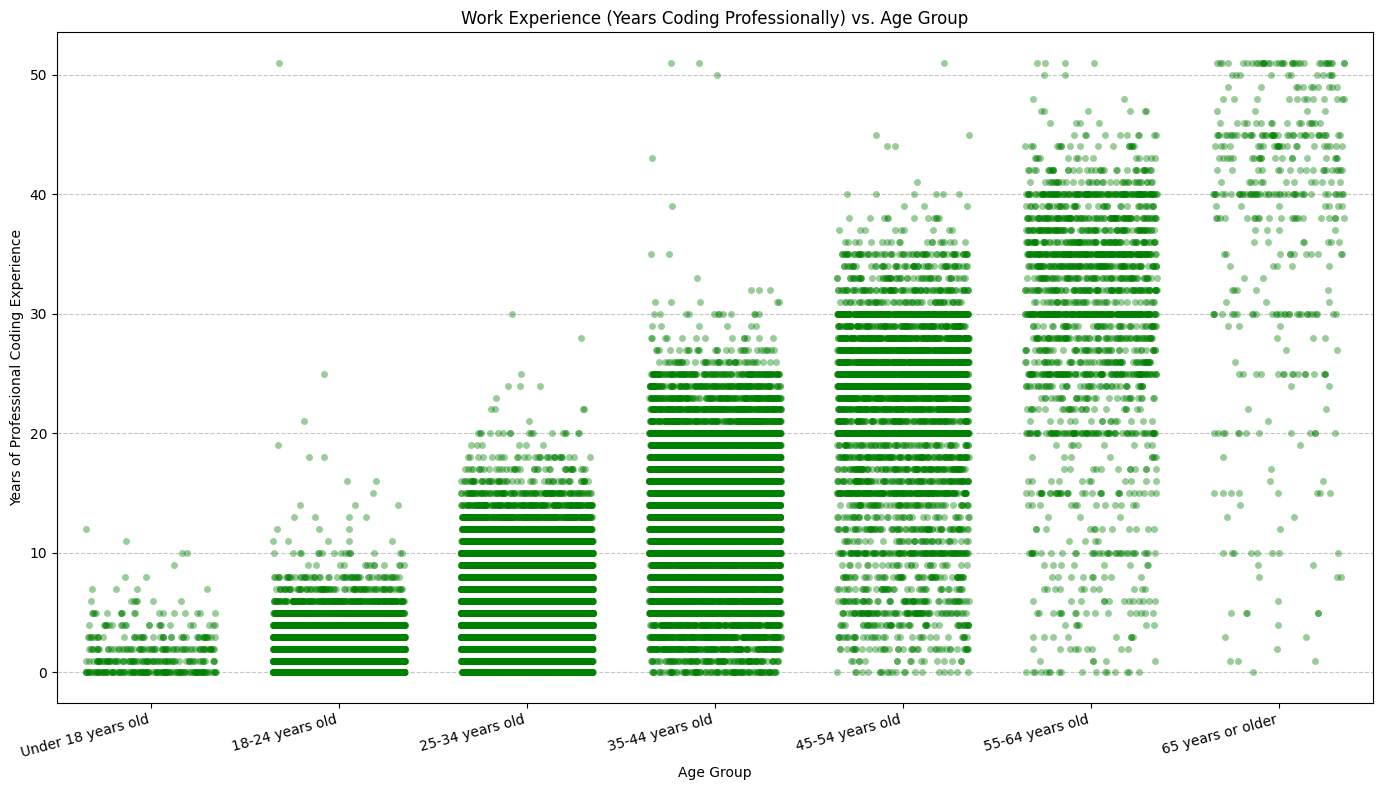

In [8]:
# Function to clean 'YearsCodePro' and 'YearsCode' (if not already defined)
def clean_years(year_str):
    if pd.isna(year_str): return None
    text = str(year_str).lower().strip()
    if text == 'less than 1 year': return 0
    elif text == 'more than 50 years': return 51 # Use 51 to represent >50
    try: return int(text)
    except ValueError: return None # Handle any other non-numeric strings

# --- Scatter Plot for Age vs. Work Experience (YearsCodePro) ---
print("\n--- Generating: Scatter Plot for Age vs. Work Experience ---")

if 'Age' in df.columns and 'YearsCodePro' in df.columns:
    # Prepare data for this specific plot
    data_age_exp = df[['Age', 'YearsCodePro']].copy()

    print("Cleaning 'YearsCodePro' column for plotting...")
    data_age_exp['YearsCodePro_Numeric'] = data_age_exp['YearsCodePro'].apply(clean_years)

    # Drop rows missing essential data for this plot
    data_age_exp.dropna(subset=['Age', 'YearsCodePro_Numeric'], inplace=True)
    print(f"Using {len(data_age_exp)} rows after cleaning and dropping NAs for Age/YearsCodePro.")

    # Filter to include only the standard age groups and make 'Age' categorical
    data_age_exp = data_age_exp[data_age_exp['Age'].isin(age_order)]
    data_age_exp['Age'] = pd.Categorical(data_age_exp['Age'], categories=age_order, ordered=True)
    print(f"Using {len(data_age_exp)} rows after filtering for valid age groups.")


    # Create the scatter plot (using stripplot for categorical x-axis)
    plt.figure(figsize=(14, 8))
    sns.stripplot(data=data_age_exp, x='Age', y='YearsCodePro_Numeric', jitter=0.35, alpha=0.4, size=5, color='green')

    plt.title('Work Experience (Years Coding Professionally) vs. Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Years of Professional Coding Experience')
    plt.xticks(rotation=15, ha='right') # Rotate labels for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("Plot skipped: Required columns 'Age' or 'YearsCodePro' not found in the DataFrame.")

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.



--- Generating: Bubble Plot - Comp vs. Satisfaction (Size=Age) ---
Using 16185 rows after dropping NAs for Comp/Sat/Age.
Using 16177 rows after filtering for valid age groups.
Created 'AgeNumeric' column using category codes for bubble sizing.
Filtered out 254 rows with compensation > $300,000


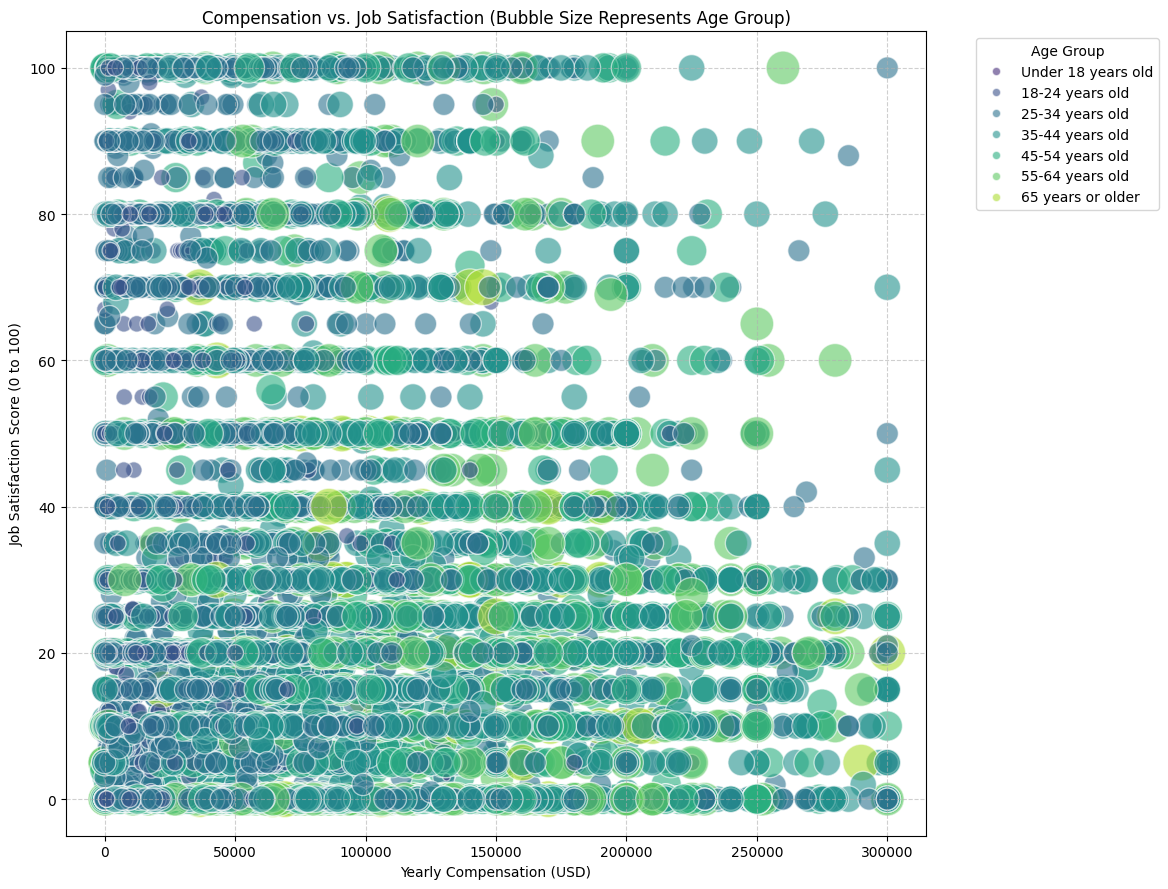

In [9]:
# Define a compensation threshold for filtering (adjust as needed)
comp_threshold = 300000


# --- Task 3.1: Bubble Plot: Compensation vs. Job Satisfaction (Size=Age) ---
print("\n--- Generating: Bubble Plot - Comp vs. Satisfaction (Size=Age) ---")

if 'ConvertedCompYearly' in df.columns and 'JobSatPoints_6' in df.columns and 'Age' in df.columns:
    # Prepare data
    data_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].copy()

    # Ensure required columns are numeric (redundant if done globally, but safe)
    data_bubble['ConvertedCompYearly'] = pd.to_numeric(data_bubble['ConvertedCompYearly'], errors='coerce')
    data_bubble['JobSatPoints_6'] = pd.to_numeric(data_bubble['JobSatPoints_6'], errors='coerce')

    # Drop rows with missing values in essential columns for this plot
    data_bubble.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'], inplace=True)
    print(f"Using {len(data_bubble)} rows after dropping NAs for Comp/Sat/Age.")


    # Filter valid age groups and set categorical type
    data_bubble = data_bubble[data_bubble['Age'].isin(age_order)]
    data_bubble['Age'] = pd.Categorical(data_bubble['Age'], categories=age_order, ordered=True)
    print(f"Using {len(data_bubble)} rows after filtering for valid age groups.")


    # Create a numeric representation of Age for bubble size
    # Using category codes preserves the defined order (0=Under 18, 1=18-24, etc.)
    data_bubble['AgeNumeric'] = data_bubble['Age'].cat.codes
    print("Created 'AgeNumeric' column using category codes for bubble sizing.")


    # Optionally filter out extreme compensation values for better visibility
    rows_before_filter = len(data_bubble)
    data_bubble_filtered = data_bubble[data_bubble['ConvertedCompYearly'] <= comp_threshold].copy() # Use .copy() to avoid SettingWithCopyWarning
    rows_after_filter = len(data_bubble_filtered)
    print(f"Filtered out {rows_before_filter - rows_after_filter} rows with compensation > ${comp_threshold:,}")


    # Create the bubble plot
    plt.figure(figsize=(14, 9))
    bubble_plot = sns.scatterplot(
        data=data_bubble_filtered,
        x='ConvertedCompYearly',
        y='JobSatPoints_6',
        size='AgeNumeric',  # Size mapped to the numerical age code
        hue='Age',         # Color mapped to the categorical Age group
        sizes=(30, 700),   # Define the range of bubble sizes (min, max)
        alpha=0.6,         # Transparency for overlapping bubbles
        palette='viridis'  # Color palette suitable for ordered data
    )

    plt.title('Compensation vs. Job Satisfaction (Bubble Size Represents Age Group)')
    plt.xlabel('Yearly Compensation (USD)')
    plt.ylabel('Job Satisfaction Score (0 to 100)')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Customize the legend for clarity
    handles, labels = bubble_plot.get_legend_handles_labels()
    # Identify handles/labels for the 'Age' hue (usually the first few after the title)
    try:
        # Find the start and end of the hue labels in the full legend list
        hue_start_index = labels.index(age_order[0])
        hue_end_index = labels.index(age_order[-1]) + 1
        age_hue_handles = handles[hue_start_index:hue_end_index]
        age_hue_labels = labels[hue_start_index:hue_end_index]
        plt.legend(age_hue_handles, age_hue_labels, title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    except ValueError:
        print("Warning: Could not automatically parse legend for customization. Displaying default legend.")
        plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')


    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend outside plot area
    plt.show()

else:
    print("Bubble plot skipped: Required columns 'ConvertedCompYearly', 'JobSatPoints_6', or 'Age' not found.")

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.



--- Generating: Language Popularity vs. Job Satisfaction Plot ---
Plotting 46 languages with at least 150 users.


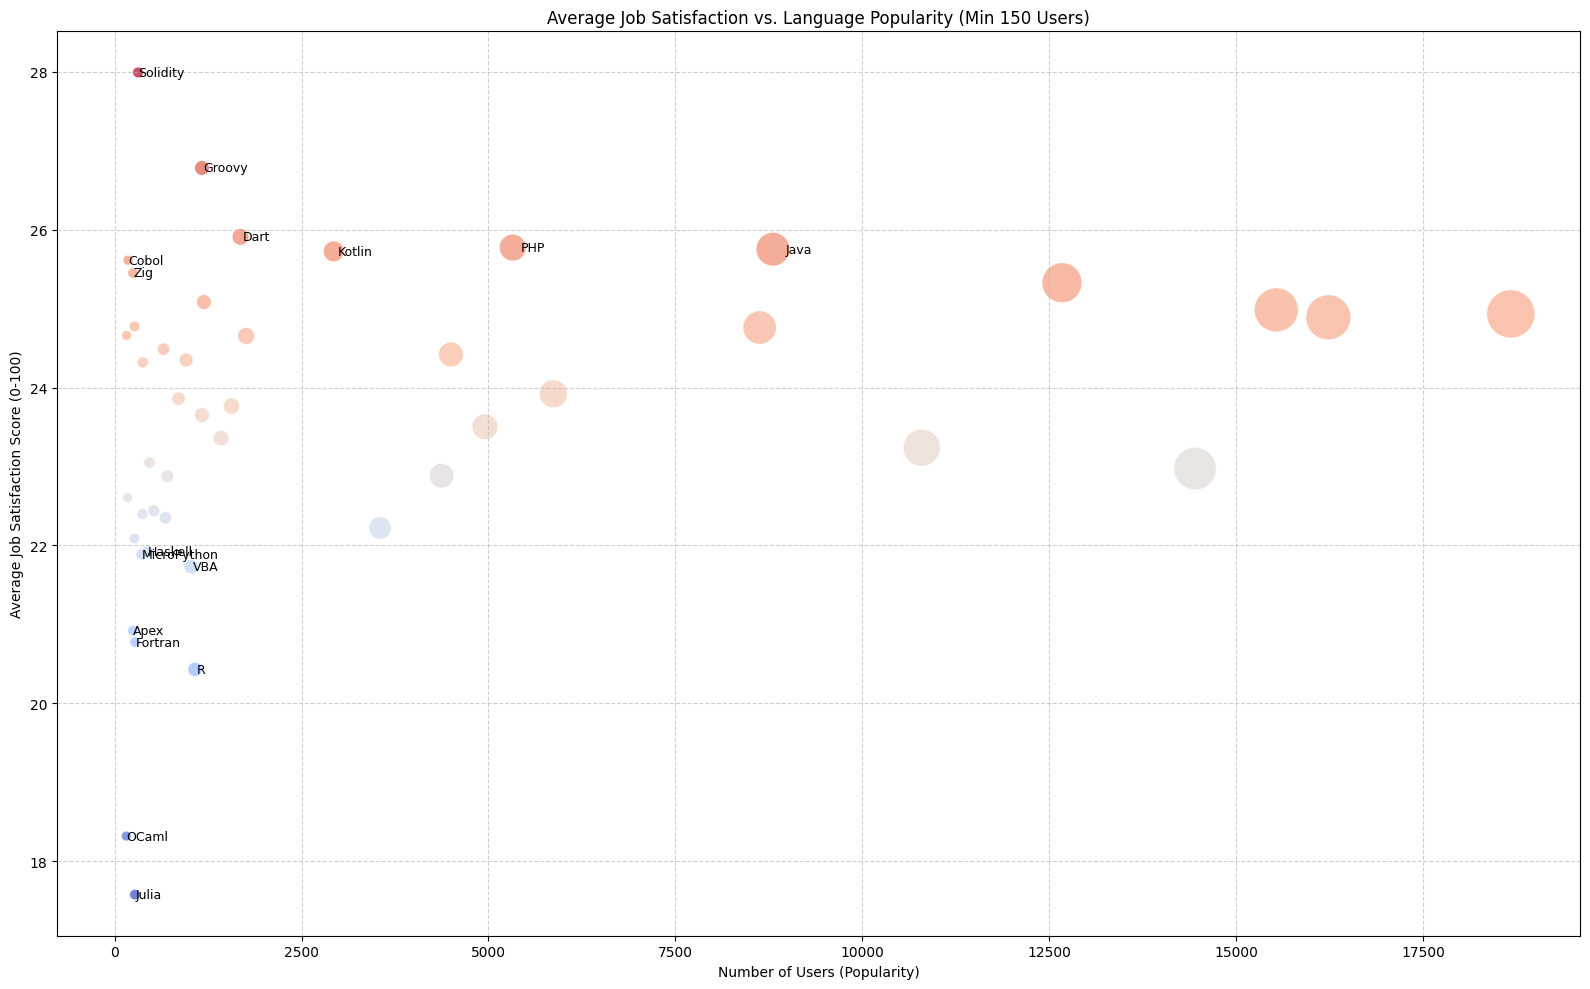

In [10]:
# --- Task 3.2: Scatter Plot for Language Popularity vs. Job Satisfaction ---
print("\n--- Generating: Language Popularity vs. Job Satisfaction Plot ---")

if 'LanguageHaveWorkedWith' in df.columns and 'JobSatPoints_6' in df.columns:
    # 1. Prepare the data
    data_lang_sat = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].copy()
    data_lang_sat.dropna(inplace=True) # Drop rows missing satisfaction or language data

    # Ensure Language column is string type before splitting
    data_lang_sat['LanguageHaveWorkedWith'] = data_lang_sat['LanguageHaveWorkedWith'].astype(str)

    # 2. Explode the languages column to have one row per respondent per language
    lang_split = data_lang_sat['LanguageHaveWorkedWith'].str.split(';')
    lang_exploded = data_lang_sat.assign(Language=lang_split).explode('Language')

    # Clean up language names (remove leading/trailing whitespace)
    lang_exploded['Language'] = lang_exploded['Language'].str.strip()
    # Optional: Filter out empty strings if split results in them
    lang_exploded = lang_exploded[lang_exploded['Language'] != '']

    # 3. Calculate average satisfaction and count (popularity) for each language
    lang_stats = lang_exploded.groupby('Language')['JobSatPoints_6'].agg(
        AvgSatisfaction='mean',
        UserCount='count'
    ).reset_index() # reset_index makes 'Language' a column again

    # 4. Filter for more popular languages to make the plot readable
    min_users_threshold = 150 # Adjust this threshold as needed
    lang_stats_filtered = lang_stats[lang_stats['UserCount'] >= min_users_threshold].copy()
    lang_stats_filtered.sort_values(by='AvgSatisfaction', ascending=False, inplace=True)
    print(f"Plotting {len(lang_stats_filtered)} languages with at least {min_users_threshold} users.")

    # 5. Create the scatter plot
    plt.figure(figsize=(16, 10)) # Adjust figure size for better label spacing
    scatter_plot = sns.scatterplot(
        data=lang_stats_filtered,
        x='UserCount',
        y='AvgSatisfaction',
        size='UserCount',       # Optional: Make bubble size reflect popularity
        hue='AvgSatisfaction',  # Optional: Color points by satisfaction level
        palette='coolwarm',     # Color map (cool=low sat, warm=high sat)
        sizes=(50, 1200),       # Range of bubble sizes
        alpha=0.7,
        legend=False            # Turn off default legend, labels will be added
    )

    # 6. Add text labels for (some) languages to identify points
    # Labeling top N and bottom N languages by satisfaction to reduce clutter
    num_labels_each_end = 8
    points_to_label = pd.concat([
        lang_stats_filtered.head(num_labels_each_end),
        lang_stats_filtered.tail(num_labels_each_end)
    ]).drop_duplicates()

    for idx, row in points_to_label.iterrows():
        plt.text(
            x=row['UserCount'] * 1.02, # Position label slightly to the right of the point
            y=row['AvgSatisfaction'],
            s=row['Language'],         # The text label is the language name
            fontdict=dict(color='black', size=9),
            ha='left',                 # Horizontal alignment
            va='center'                # Vertical alignment
        )

    # 7. Add plot titles and labels
    plt.title(f'Average Job Satisfaction vs. Language Popularity (Min {min_users_threshold} Users)')
    plt.xlabel('Number of Users (Popularity)')
    plt.ylabel('Average Job Satisfaction Score (0-100)')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Optional: Use log scale for x-axis if user counts vary drastically
    # plt.xscale('log')
    # plt.xlabel('Number of Users (Popularity - Log Scale)')

    plt.tight_layout()
    plt.show()

else:
    print("Plot skipped: Required columns 'LanguageHaveWorkedWith' or 'JobSatPoints_6' not found.")


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.



--- Generating: Comp vs. Satisfaction by Employment Type Plot ---
Using 16185 rows after dropping NAs for Comp/Sat/Employment.
Filtered out 254 compensation outliers (>$300,000).

Employment Types being plotted:
Employment
Employed, full-time                                                                                                                                                                                                     12404
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 1295
Independent contractor, freelancer, or self-employed                                                                                                                                                                      624
Employed, part-time                                                                                           

/tmp/ipykernel_365/2216599345.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust right boundary to make space


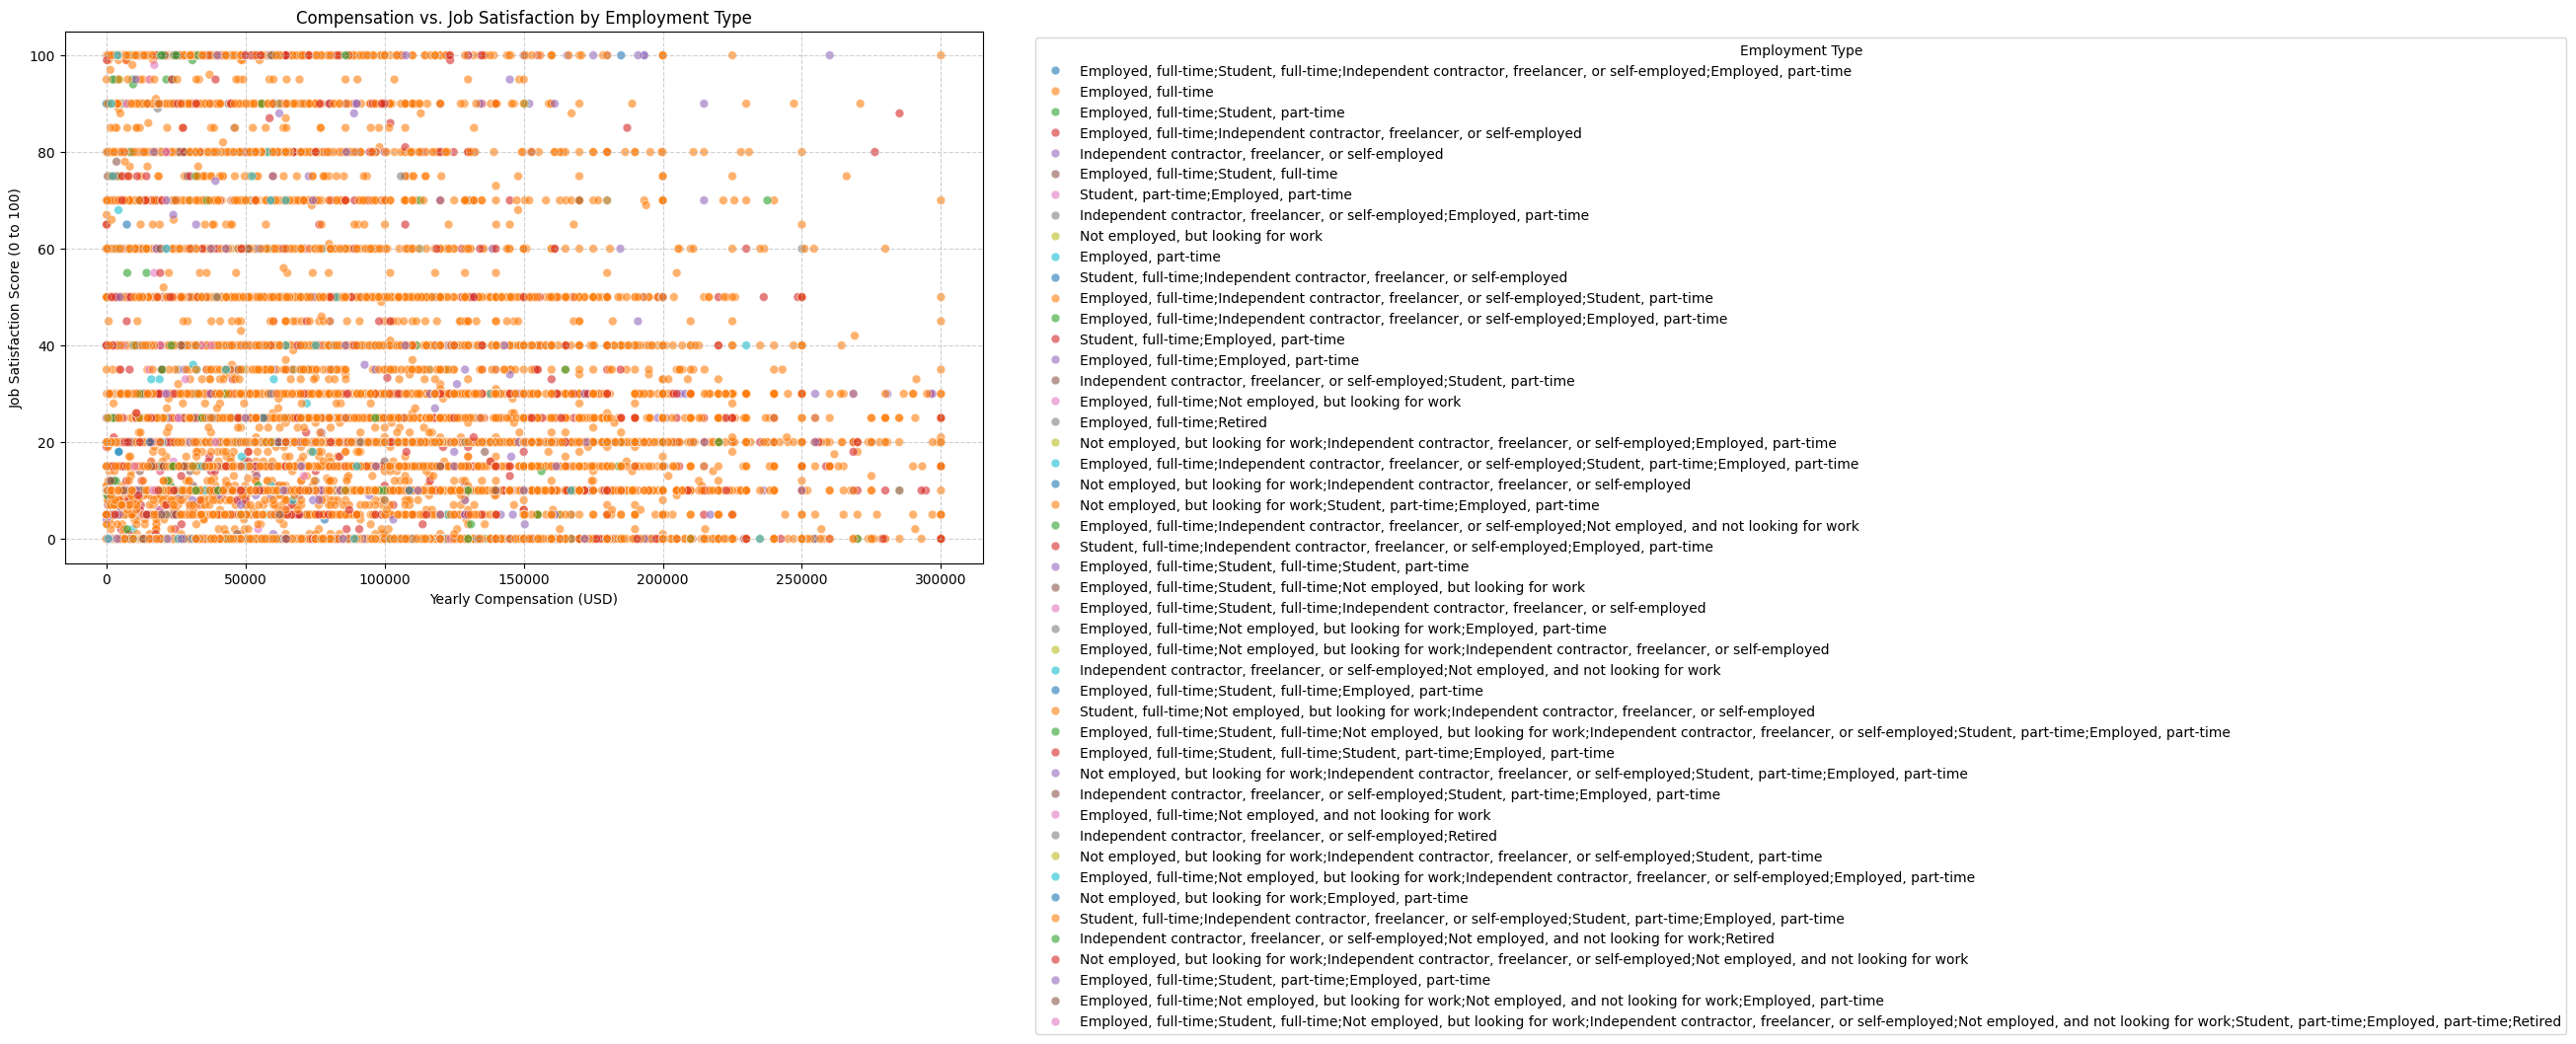

In [11]:
# Define a compensation threshold for filtering (reuse if defined earlier)
comp_threshold = 300000

# --- Task 4.1: Compensation vs. Job Satisfaction by Employment Type ---
print("\n--- Generating: Comp vs. Satisfaction by Employment Type Plot ---")

if 'ConvertedCompYearly' in df.columns and 'JobSatPoints_6' in df.columns and 'Employment' in df.columns:
    # 1. Prepare the data
    data_comp_sat_emp = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].copy()

    # Ensure Employment is string and cleaned
    data_comp_sat_emp['Employment'] = data_comp_sat_emp['Employment'].astype(str).str.strip()

    # Drop rows with missing values in the essential columns for this plot
    data_comp_sat_emp.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'], inplace=True)
    # Also handle potential 'nan' strings in Employment if they weren't actual NaNs before astype(str)
    data_comp_sat_emp = data_comp_sat_emp[data_comp_sat_emp['Employment'].str.lower() != 'nan']
    print(f"Using {len(data_comp_sat_emp)} rows after dropping NAs for Comp/Sat/Employment.")

    # 2. Optionally filter out extreme compensation values
    rows_before_filter = len(data_comp_sat_emp)
    data_comp_sat_emp_filtered = data_comp_sat_emp[data_comp_sat_emp['ConvertedCompYearly'] <= comp_threshold].copy()
    rows_after_filter = len(data_comp_sat_emp_filtered)
    print(f"Filtered out {rows_before_filter - rows_after_filter} compensation outliers (>${comp_threshold:,}).")

    # 3. Check unique employment types being plotted
    print("\nEmployment Types being plotted:")
    print(data_comp_sat_emp_filtered['Employment'].value_counts())

    # 4. Create the scatter plot using hue for Employment type
    plt.figure(figsize=(12, 7)) # Adjust figsize as needed
    sns.scatterplot(
        data=data_comp_sat_emp_filtered,
        x='ConvertedCompYearly',
        y='JobSatPoints_6',
        hue='Employment',    # Color points based on Employment status
        alpha=0.6,           # Adjust transparency for overlap
        s=40,                # Adjust point size
        palette='tab10'      # Use a palette suitable for categorical data (e.g., tab10, Set1, Paired)
        # style='Employment' # Alternative: use different markers instead of/with color
    )

    # 5. Add titles and labels
    plt.title('Compensation vs. Job Satisfaction by Employment Type')
    plt.xlabel('Yearly Compensation (USD)')
    plt.ylabel('Job Satisfaction Score (0 to 100)')
    plt.grid(True, linestyle='--', alpha=0.6)

    # 6. Add and position the legend
    plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 7. Adjust layout to prevent legend overlap
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust right boundary to make space

    plt.show()

else:
    print("Plot skipped: Required columns 'ConvertedCompYearly', 'JobSatPoints_6', or 'Employment' not found.")

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.



--- Generating: Work Exp vs. Age Group by Country (Color=Country, Marker=Age) ---
Cleaning 'YearsCodePro' column...
Using 50394 rows after cleaning and dropping NAs.
Using 50273 rows after filtering for valid age groups.

Filtering data to include only the top 6 countries: ['United States of America', 'Germany', 'India', 'United Kingdom of Great Britain and Northern Ireland', 'Ukraine', 'France']
Using 24202 rows for the plot.


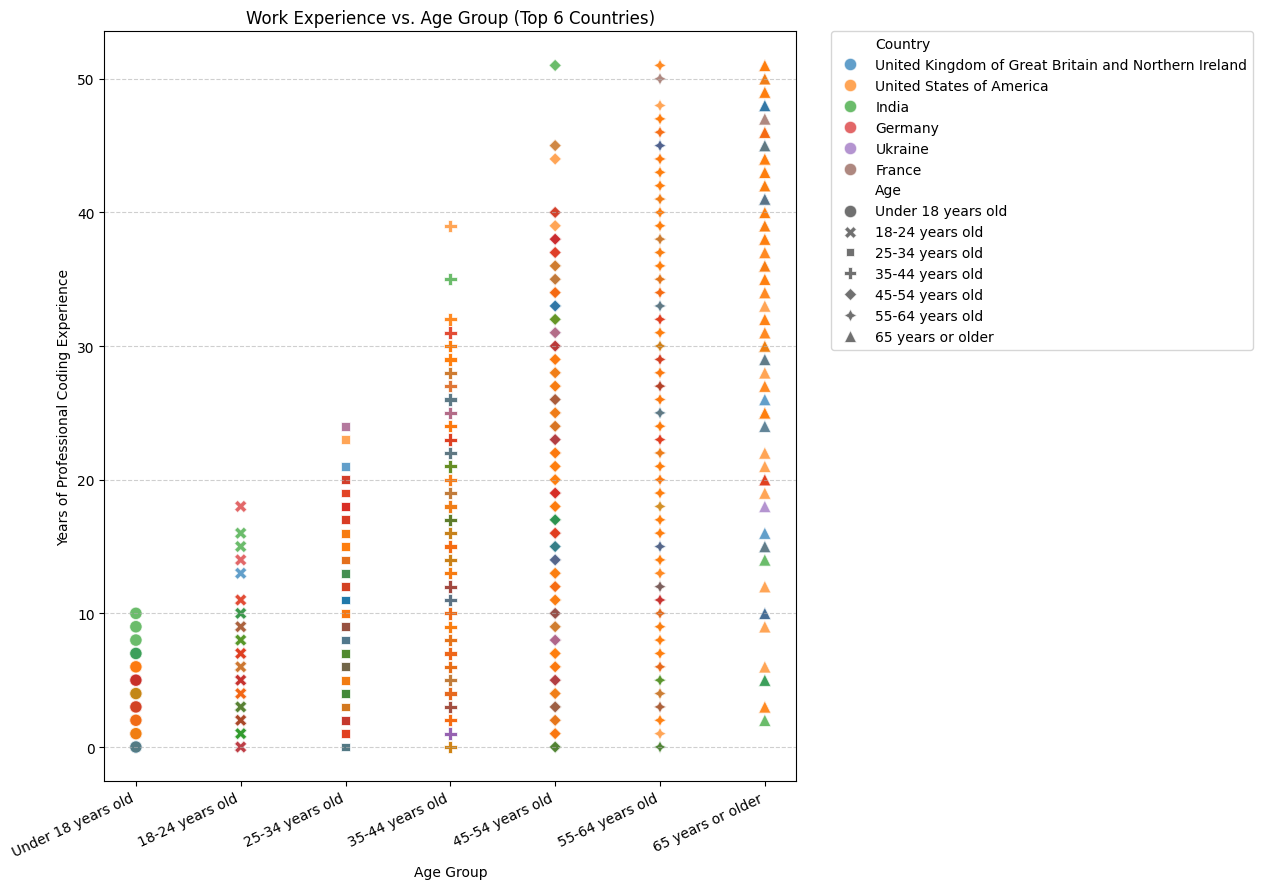


Note: For comparing many countries, using sns.relplot with col='Country' 
and style='Age' might provide a clearer visualization by creating separate facets for each country.


In [12]:
# Function to clean 'YearsCodePro' (if not already defined)
def clean_years(year_str):
    if pd.isna(year_str): return None
    text = str(year_str).lower().strip()
    if text == 'less than 1 year': return 0
    elif text == 'more than 50 years': return 51 # Use 51 to represent >50
    try: return int(text)
    except ValueError: return None # Handle any other non-numeric strings

# --- Task 4.2: Work Experience vs. Age Group by Country ---
print("\n--- Generating: Work Exp vs. Age Group by Country (Color=Country, Marker=Age) ---")

if 'YearsCodePro' in df.columns and 'Age' in df.columns and 'Country' in df.columns:
    # 1. Prepare data
    data_exp_age_country = df[['YearsCodePro', 'Age', 'Country']].copy()

    # Clean YearsCodePro
    print("Cleaning 'YearsCodePro' column...")
    data_exp_age_country['YearsCodePro_Numeric'] = data_exp_age_country['YearsCodePro'].apply(clean_years)

    # Drop rows missing essential data
    data_exp_age_country.dropna(subset=['YearsCodePro_Numeric', 'Age', 'Country'], inplace=True)
    # Handle potential 'nan' strings in Country if they exist
    data_exp_age_country = data_exp_age_country[data_exp_age_country['Country'].str.lower() != 'nan']
    print(f"Using {len(data_exp_age_country)} rows after cleaning and dropping NAs.")


    # 2. Filter for valid Age groups and make categorical
    data_exp_age_country = data_exp_age_country[data_exp_age_country['Age'].isin(age_order)]
    data_exp_age_country['Age'] = pd.Categorical(data_exp_age_country['Age'], categories=age_order, ordered=True)
    print(f"Using {len(data_exp_age_country)} rows after filtering for valid age groups.")


    # 3. Filter to Top N Countries to make the plot manageable
    top_n_countries = 6 # Adjust N as needed (lower N is clearer)
    country_counts = data_exp_age_country['Country'].value_counts()
    top_countries_list = country_counts.nlargest(top_n_countries).index.tolist()
    print(f"\nFiltering data to include only the top {top_n_countries} countries: {top_countries_list}")
    data_filtered = data_exp_age_country[data_exp_age_country['Country'].isin(top_countries_list)].copy()
    print(f"Using {len(data_filtered)} rows for the plot.")


    # 4. Create the scatter plot
    plt.figure(figsize=(15, 9)) # Adjust figure size
    scatter = sns.scatterplot(
        data=data_filtered,
        x='Age',                     # Categorical Age on x-axis
        y='YearsCodePro_Numeric',    # Numeric Experience on y-axis
        hue='Country',               # Color points by Country
        style='Age',                 # Use different markers for Age groups
        s=80,                        # Point size
        alpha=0.7,                   # Point transparency
        palette='tab10'              # Color palette for countries (adjust if N > 10)
        # You might need more markers than default if many age groups exist
    )

    # 5. Customize plot
    plt.title(f'Work Experience vs. Age Group (Top {top_n_countries} Countries)')
    plt.xlabel('Age Group')
    plt.ylabel('Years of Professional Coding Experience')
    plt.xticks(rotation=25, ha='right') # Rotate x-labels for readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

    # Adjust legend position (might need tweaking depending on N countries/ages)
    # Placing it outside the plot is often necessary
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend space
    plt.show()

    # --- Note on Alternative Visualization ---
    print("\nNote: For comparing many countries, using sns.relplot with col='Country' ")
    print("and style='Age' might provide a clearer visualization by creating separate facets for each country.")
    # Example (same data_filtered):
    # g = sns.relplot(data=data_filtered, x='Age', y='YearsCodePro_Numeric',
    #                 col='Country', style='Age', kind='scatter',
    #                 col_wrap=3, height=4, aspect=1.2, s=50, alpha=0.6)
    # g.set_xticklabels(rotation=30, ha='right')
    # g.fig.suptitle(f'Work Exp vs Age Faceted by Top {top_n_countries} Countries', y=1.03)
    # plt.tight_layout(rect=[0, 0, 1, 0.97])
    # plt.show()


else:
    print("Plot skipped: Required columns 'YearsCodePro', 'Age', or 'Country' not found.")

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
